# Flood Prediction Machine Learning Model 

#### Importing Required Libraries.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('..\dataset\India.csv')
print(data)

   COUNTRY  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0    INDIA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1    INDIA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2    INDIA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3    INDIA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4    INDIA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..     ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
81   INDIA  1982   8.2   7.2  35.8   39.9  221.8   816.4   586.4  471.5   
82   INDIA  1983   2.6  16.1   9.4   38.6  103.8   448.5  1125.2  667.8   
83   INDIA  1984  16.4   3.9  14.2   84.1  196.6   728.5   908.4  341.2   
84   INDIA  1985  14.8  12.8  19.2   50.5  189.1   546.8   635.9  394.6   
85   INDIA  1986  10.1   5.5  16.5   49.5  150.2   680.8   602.6  574.6   

      SEP    OCT    NOV    DEC  ANNUAL RAINFALL FLOODS  
0   197.7  266.9  350.8   48.4           3

In [3]:
data.head()

,COUNTRY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,INDIA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,INDIA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,INDIA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,INDIA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,INDIA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
data.tail()

,COUNTRY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
81,INDIA,1982,8.2,7.2,35.8,39.9,221.8,816.4,586.4,471.5,208.9,182.5,209.5,64.9,2853.0,YES
82,INDIA,1983,2.6,16.1,9.4,38.6,103.8,448.5,1125.2,667.8,316.2,332.2,125.7,15.3,3201.4,YES
83,INDIA,1984,16.4,3.9,14.2,84.1,196.6,728.5,908.4,341.2,154.6,310.2,74.2,45.3,2877.6,YES
84,INDIA,1985,14.8,12.8,19.2,50.5,189.1,546.8,635.9,394.6,199.3,191.2,52.6,16.2,2322.9,NO
85,INDIA,1986,10.1,5.5,16.5,49.5,150.2,680.8,602.6,574.6,322.8,337.5,178.3,50.6,2979.0,YES


# Finding number of missing values

In [5]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

COUNTRY            0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOODS             0
dtype: int64

# Analyzing the Dataset

In [6]:
print(data.shape)

(86, 16)


In [7]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1943.500000,13.904651,12.069767,27.298837,78.333721,181.204651,716.593023,779.850000,433.300000,241.475581,300.231395,152.543023,40.732558,2977.583721
std,24.969982,13.902314,11.357092,18.805872,38.969057,120.870210,177.768355,201.872694,164.535854,94.696121,86.771016,65.792922,29.546018,381.376619
min,1901.000000,0.000000,0.100000,0.600000,12.300000,38.600000,341.000000,167.500000,178.600000,48.400000,135.800000,33.900000,0.100000,2178.600000
25%,1922.250000,2.925000,4.725000,13.975000,50.525000,114.600000,589.350000,656.250000,335.625000,169.900000,237.600000,102.825000,15.425000,2719.375000
50%,1943.500000,10.950000,9.000000,23.550000,73.650000,149.650000,704.200000,774.500000,404.000000,240.250000,302.350000,146.900000,38.500000,2957.400000
75%,1964.750000,18.800000,16.425000,37.500000,99.000000,205.775000,849.800000,894.825000,494.875000,297.100000,356.975000,183.350000,55.375000,3245.475000
max,1986.000000,74.500000,65.900000,79.400000,210.700000,738.800000,1162.200000,1526.500000,1199.200000,491.600000,543.200000,350.800000,135.200000,4226.400000


In [8]:
data.info

<bound method DataFrame.info of    COUNTRY  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0    INDIA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1    INDIA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2    INDIA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3    INDIA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4    INDIA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..     ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
81   INDIA  1982   8.2   7.2  35.8   39.9  221.8   816.4   586.4  471.5   
82   INDIA  1983   2.6  16.1   9.4   38.6  103.8   448.5  1125.2  667.8   
83   INDIA  1984  16.4   3.9  14.2   84.1  196.6   728.5   908.4  341.2   
84   INDIA  1985  14.8  12.8  19.2   50.5  189.1   546.8   635.9  394.6   
85   INDIA  1986  10.1   5.5  16.5   49.5  150.2   680.8   602.6  574.6   

      SEP    OCT    NOV    DEC  ANNUAL RAINFALL FLOODS  
0   197.7 

In [9]:
numeric_data = data.drop(columns=['COUNTRY', 'FLOODS'])
print(numeric_data.cov())


                        YEAR         JAN         FEB          MAR  \
YEAR              623.500000  -94.587059  -61.928235  -162.960588   
JAN               -94.587059  193.274331  -10.096446    63.281300   
FEB               -61.928235  -10.096446  128.983546    60.479141   
MAR              -162.960588   63.281300   60.479141   353.660822   
APR              -403.302941   97.726782  123.445267   241.066628   
MAY              -688.868235  177.463625   44.260848   255.605770   
JUN              -265.510588  274.267092  -35.878566   313.087168   
JUL               202.957059  -59.083647 -530.175176  -172.344412   
AUG               305.045882  -81.150706 -255.070000   330.315176   
SEP               167.286471 -343.614356  116.272665   178.463148   
OCT              -174.446471  -49.639912  -21.777510  -189.663140   
NOV              -438.374706  128.023680  220.899198   285.189462   
DEC               -43.877647  -71.554859  -29.725592    69.148862   
ANNUAL RAINFALL -1658.128235  318.

In [10]:
print(numeric_data.corr())


                     YEAR       JAN       FEB       MAR       APR       MAY  \
YEAR             1.000000 -0.272475 -0.218375 -0.347033 -0.414470 -0.228244   
JAN             -0.272475  1.000000 -0.063946  0.242044  0.180388  0.105609   
FEB             -0.218375 -0.063946  1.000000  0.283169  0.278925  0.032243   
MAR             -0.347033  0.242044  0.283169  1.000000  0.328945  0.112450   
APR             -0.414470  0.180388  0.278925  0.328945  1.000000  0.144729   
MAY             -0.228244  0.105609  0.032243  0.112450  0.144729  1.000000   
JUN             -0.059815  0.110977 -0.017771  0.093652  0.099737 -0.139813   
JUL              0.040263 -0.021052 -0.231246 -0.045397 -0.035622 -0.211401   
AUG              0.074248 -0.035477 -0.136500  0.106752  0.000674 -0.116422   
SEP              0.070747 -0.261007  0.108113  0.100213  0.027766  0.218972   
OCT             -0.080514 -0.041150 -0.022099 -0.116229  0.063901  0.192809   
NOV             -0.266838  0.139966  0.295630  0.230

In [11]:
print(numeric_data.corr())


                     YEAR       JAN       FEB       MAR       APR       MAY  \
YEAR             1.000000 -0.272475 -0.218375 -0.347033 -0.414470 -0.228244   
JAN             -0.272475  1.000000 -0.063946  0.242044  0.180388  0.105609   
FEB             -0.218375 -0.063946  1.000000  0.283169  0.278925  0.032243   
MAR             -0.347033  0.242044  0.283169  1.000000  0.328945  0.112450   
APR             -0.414470  0.180388  0.278925  0.328945  1.000000  0.144729   
MAY             -0.228244  0.105609  0.032243  0.112450  0.144729  1.000000   
JUN             -0.059815  0.110977 -0.017771  0.093652  0.099737 -0.139813   
JUL              0.040263 -0.021052 -0.231246 -0.045397 -0.035622 -0.211401   
AUG              0.074248 -0.035477 -0.136500  0.106752  0.000674 -0.116422   
SEP              0.070747 -0.261007  0.108113  0.100213  0.027766  0.218972   
OCT             -0.080514 -0.041150 -0.022099 -0.116229  0.063901  0.192809   
NOV             -0.266838  0.139966  0.295630  0.230

In [12]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

C:\Users\Hari\AppData\Local\Temp\ipykernel_8356\1920187067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
C:\Users\Hari\AppData\Local\Temp\ipykernel_8356\1920187067.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['FLOODS'].replace

In [13]:
#Printing the clean data
data.head()

,COUNTRY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,INDIA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,INDIA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,INDIA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,INDIA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,INDIA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [14]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [15]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0     1
1     1
2     1
3     1
4     0
     ..
81    1
82    1
83    1
84    0
85    1
Name: FLOODS, Length: 86, dtype: int64

# Plotting the Data


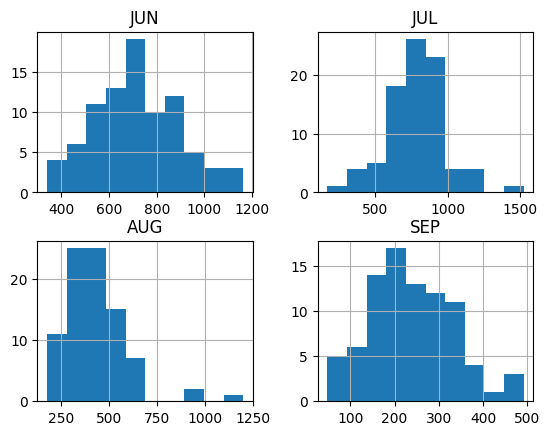

In [16]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

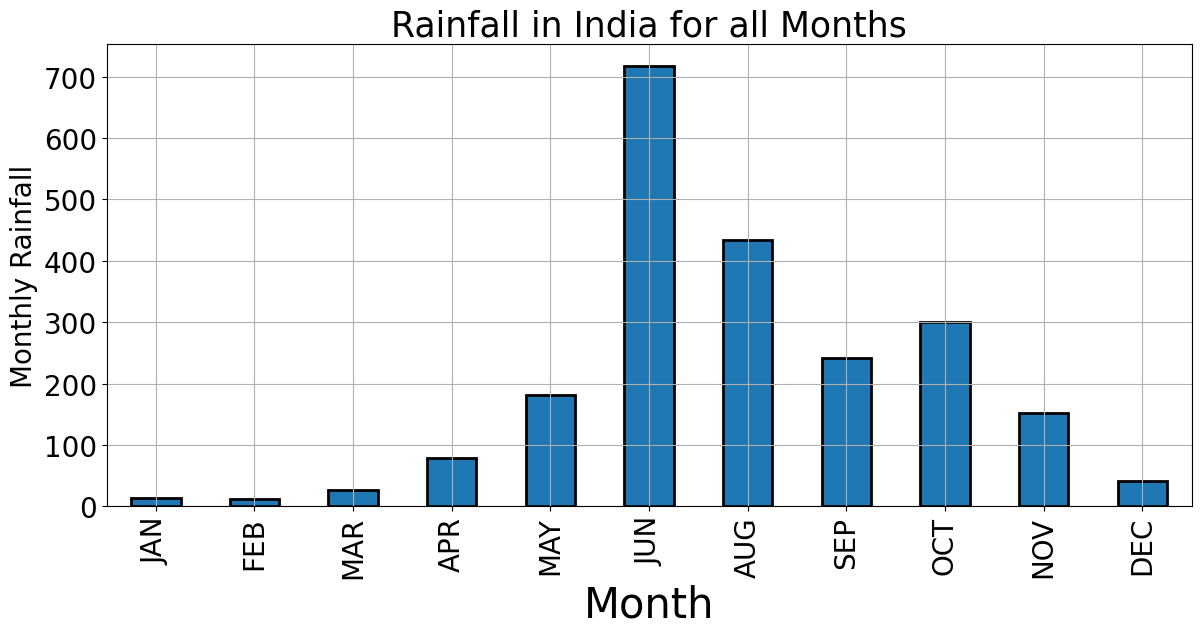

In [17]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in India for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# Using sklearn to develop the ML Model

In [18]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.3852349 , 0.67781155, ..., 0.32179676, 1.        ,
        0.35751295],
       [0.01176471, 0.08993289, 0.03799392, ..., 0.54639175, 0.39255286,
        0.89859363],
       [0.02352941, 0.04295302, 0.28115502, ..., 0.53583702, 0.38845062,
        0.43597335],
       ...,
       [0.97647059, 0.22013423, 0.05775076, ..., 0.42808051, 0.12716945,
        0.33456699],
       [0.98823529, 0.19865772, 0.19300912, ..., 0.13598429, 0.05900915,
        0.11917098],
       [1.        , 0.13557047, 0.08206687, ..., 0.49509082, 0.45566425,
        0.37379719]])

In [19]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
27,1928,12.7,65.9,51.3,121.1,81.9,590.7,420.6,553.2,75.9,321.5,155.2,52.7
83,1984,16.4,3.9,14.2,84.1,196.6,728.5,908.4,341.2,154.6,310.2,74.2,45.3
62,1963,15.7,12.1,1.5,42.4,154.3,827.3,914.3,463.4,167.9,404.7,98.2,64.7
81,1982,8.2,7.2,35.8,39.9,221.8,816.4,586.4,471.5,208.9,182.5,209.5,64.9
40,1941,0.7,18.3,14.7,76.3,78.2,637.4,900.5,388.1,72.6,262.1,184.3,11.2


In [20]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [21]:
x_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
7,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0
9,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1
29,1930,10.8,10.8,39.0,102.7,404.9,633.1,401.7,273.4,411.5,433.9,207.0,89.2
51,1952,11.2,15.9,34.5,136.5,123.6,687.1,825.3,240.3,185.3,237.4,189.6,64.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [22]:
# type casting.
y_train=y_train.astype('int')
y_train

27    0
83    1
62    1
81    1
40    0
     ..
46    1
2     1
64    1
14    1
1     1
Name: FLOODS, Length: 68, dtype: int32

In [23]:
y_test=y_test.astype('int')
y_test

7     0
9     0
29    1
51    1
4     0
75    1
34    1
15    1
74    1
44    1
6     1
59    1
58    1
22    1
28    1
67    0
61    1
55    1
Name: FLOODS, dtype: int32

# Using Prediction Algorithms:

## KNN classifier to predict

In [24]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
7     0
9     0
29    1
51    1
4     0
75    1
34    1
15    1
74    1
44    1
6     1
59    1
58    1
22    1
28    1
67    0
61    1
55    1
Name: FLOODS, dtype: int32


In [27]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [29]:
knn_acc

array([0.73913043, 0.73913043, 0.68181818])

In [30]:
knn_proba

array([[0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4,

### How accurate is our model?

In [31]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:77.777778
Recall Score:100.000000
ROC score:50.000000
[[ 0  4]
 [ 0 14]]


## Logistic Regression to predict

In [32]:
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

C:\Users\Hari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
lr_acc

array([0.65217391, 0.69565217, 0.68181818])

In [34]:
lr_proba

array([[0.34716907, 0.65283093],
       [0.3512453 , 0.6487547 ],
       [0.31558053, 0.68441947],
       [0.34658743, 0.65341257],
       [0.36003539, 0.63996461],
       [0.30585302, 0.69414698],
       [0.40214934, 0.59785066],
       [0.42696836, 0.57303164],
       [0.36351348, 0.63648652],
       [0.20400893, 0.79599107],
       [0.28434751, 0.71565249],
       [0.19911798, 0.80088202],
       [0.18841147, 0.81158853],
       [0.34611364, 0.65388636],
       [0.46675023, 0.53324977],
       [0.1786568 , 0.8213432 ],
       [0.3538909 , 0.6461091 ],
       [0.39670656, 0.60329344],
       [0.34980703, 0.65019297],
       [0.43832609, 0.56167391],
       [0.21376188, 0.78623812],
       [0.32383632, 0.67616368],
       [0.38668028, 0.61331972],
       [0.33127859, 0.66872141],
       [0.31828294, 0.68171706],
       [0.35358006, 0.64641994],
       [0.25406724, 0.74593276],
       [0.4230081 , 0.5769919 ],
       [0.25354042, 0.74645958],
       [0.33333572, 0.66666428],
       [0.

In [35]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [36]:
print(y_test.values)

[0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [37]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


### Accuracy and Efficiency of our Model 

In [38]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:72.222222
recall score:85.714286
roc score:55.357143
[[ 1  3]
 [ 2 12]]


## Support Vector Classification to predict

In [39]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [40]:
svc_acc

array([0.73913043, 0.73913043, 0.72727273])

In [41]:
svc_proba

array([[0.37563779, 0.62436221],
       [0.44097981, 0.55902019],
       [0.24053956, 0.75946044],
       [0.27683014, 0.72316986],
       [0.36531475, 0.63468525],
       [0.16673142, 0.83326858],
       [0.36669868, 0.63330132],
       [0.26872546, 0.73127454],
       [0.30272882, 0.69727118],
       [0.16272244, 0.83727756],
       [0.22388399, 0.77611601],
       [0.26825776, 0.73174224],
       [0.24736621, 0.75263379],
       [0.27759702, 0.72240298],
       [0.68670786, 0.31329214],
       [0.24401323, 0.75598677],
       [0.22949369, 0.77050631],
       [0.46625985, 0.53374015],
       [0.43073999, 0.56926001],
       [0.66759369, 0.33240631],
       [0.06287917, 0.93712083],
       [0.35805311, 0.64194689],
       [0.51376638, 0.48623362],
       [0.2007887 , 0.7992113 ],
       [0.41775786, 0.58224214],
       [0.44271393, 0.55728607],
       [0.22367772, 0.77632228],
       [0.77312075, 0.22687925],
       [0.32711065, 0.67288935],
       [0.38187479, 0.61812521],
       [0.

In [42]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.62436221, 0.55902019, 0.75946044, 0.72316986, 0.63468525,
       0.83326858, 0.63330132, 0.73127454, 0.69727118, 0.83727756,
       0.77611601, 0.73174224, 0.75263379, 0.72240298, 0.31329214,
       0.75598677, 0.77050631, 0.53374015, 0.56926001, 0.33240631,
       0.93712083, 0.64194689, 0.48623362, 0.7992113 , 0.58224214,
       0.55728607, 0.77632228, 0.22687925, 0.67288935, 0.61812521,
       0.27396682, 0.74679339, 0.66483968, 0.70898098, 0.45886319,
       0.65649265, 0.90856534, 0.92217701, 0.80043322, 0.64529285,
       0.87145453, 0.89048454, 0.91015151, 0.83341564, 0.24794807,
       0.96447671, 0.62190846, 0.6081448 , 0.68696326, 0.79019053,
       0.8079442 , 0.74617082, 0.5500449 , 0.859898  , 0.65351215,
       0.50554881, 0.66816381, 0.64391363, 0.69427626, 0.61947052,
       0.59346947, 0.57776795, 0.60606311, 0.69102759, 0.70902764,
       0.71426918, 0.72273041, 0.62193189])

In [43]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [44]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Accuracy of our model

In [45]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:77.777778
recall score:100.000000
roc score:50.000000
[[ 0  4]
 [ 0 14]]


# Decision Tree Classification to Predict

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.65217391, 0.73913043, 0.81818182])

In [47]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [48]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]


### Printing the Accuracy

In [49]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:66.666667
recall score:71.428571
roc score:60.714286
[[ 2  2]
 [ 4 10]]


# Random Forest Classifier to predict

In [50]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [51]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [52]:
rmf_clf_acc

array([0.73913043, 0.7826087 , 0.63636364])

In [53]:
rmf_proba

array([[0.37544667, 0.62455333],
       [0.29678676, 0.70321324],
       [0.28029172, 0.71970828],
       [0.21893527, 0.78106473],
       [0.44162019, 0.55837981],
       [0.18355431, 0.81644569],
       [0.41504816, 0.58495184],
       [0.62939629, 0.37060371],
       [0.26707499, 0.73292501],
       [0.17899856, 0.82100144],
       [0.37707245, 0.62292755],
       [0.11784665, 0.88215335],
       [0.1199143 , 0.8800857 ],
       [0.32424079, 0.67575921],
       [0.41711003, 0.58288997],
       [0.23767533, 0.76232467],
       [0.22856221, 0.77143779],
       [0.3117199 , 0.6882801 ],
       [0.33756066, 0.66243934],
       [0.60778485, 0.39221515],
       [0.04050739, 0.95949261],
       [0.54869935, 0.45130065],
       [0.31516177, 0.68483823],
       [0.17881842, 0.82118158],
       [0.24533062, 0.75466938],
       [0.19088358, 0.80911642],
       [0.16655043, 0.83344957],
       [0.43160685, 0.56839315],
       [0.41485696, 0.58514304],
       [0.33067636, 0.66932364],
       [0.

In [54]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:66.666667
recall score:71.428571
roc score:60.714286
[[ 2  2]
 [ 4 10]]


# Final Accuracy of our Models 

### Comparing all the prediction models

In [55]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

C:\Users\Hari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,Score
0,KNN,0.777778
1,LR,0.722222
2,SVC,0.777778
3,DT,0.666667
4,RF,0.833333


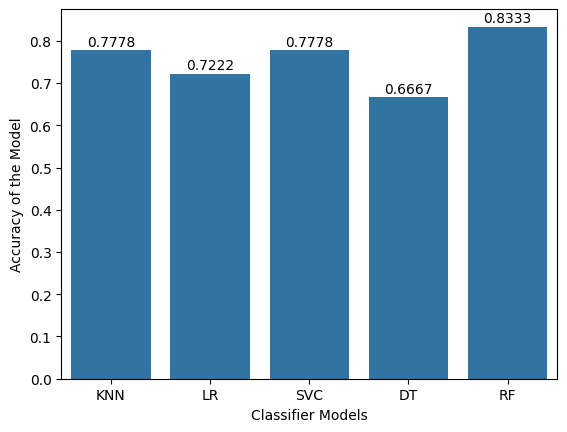

In [56]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [57]:
tr_split['Score'].max() 

0.8333333333333334

# End of the Code.